# scikit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [7]:
print(X2.shape)
print(X2[:5, :])

(100, 3)
[[ 1.          2.53521254  6.4273026 ]
 [ 1.          1.58797746  2.52167243]
 [ 1.         -0.10507531  0.01104082]
 [ 1.          2.13499763  4.55821489]
 [ 1.         -2.87887411  8.28791612]]


In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X2, y)
y_predict = reg.predict(X2)

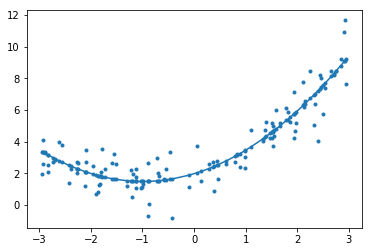

In [12]:
indexes = np.argsort(x)

plt.scatter(x, y, marker='.')
plt.plot(x[indexes], y_predict[indexes], marker='.')
plt.show()

In [13]:
print(reg.coef_)
print(reg.intercept_)

[ 0.          0.98546609  0.49641591]
1.98031229342


#### 关于PolynomialFeatures

In [14]:
x = np.arange(1, 11).reshape(-1, 2)

poly = PolynomialFeatures(degree=2)
poly.fit(x)

X = poly.transform(x)
X

array([[   1.,    1.,    2.,    1.,    2.,    4.],
       [   1.,    3.,    4.,    9.,   12.,   16.],
       [   1.,    5.,    6.,   25.,   30.,   36.],
       [   1.,    7.,    8.,   49.,   56.,   64.],
       [   1.,    9.,   10.,   81.,   90.,  100.]])

#### Pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("line_reg", LinearRegression())
])

In [16]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [19]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

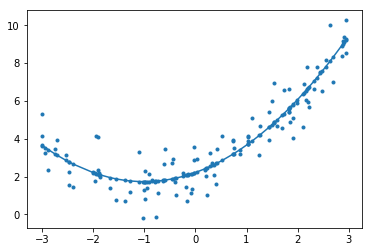

In [20]:
indexes = np.argsort(x)

plt.scatter(x, y, marker='.')
plt.plot(x[indexes], y_predict[indexes], marker='.')
plt.show()